<h1 style="text-align:center">House Prices : Advanced Regression Techniques</h3>

<h3 style="text-align:center">Load Libraries</h3>

In [139]:
import numpy as np
import pandas as pd 

# Visualizations
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

# Algorithms
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

<h3 style="text-align:center">Load Dataset</h3>

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

<h3 style="text-align:center">Analyze Data</h3>

In [3]:
# Shape
print("Train_df shape:", train_df.shape ) 
print("Test_df shape:", test_df.shape )

Train_df shape: (1460, 81)
Test_df shape: (1459, 80)


In [4]:
# Peek at the first 5 rows of the data
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Peek at the last 5 rows of the data
train_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
# Check type of each column
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [7]:
# Summarize all the missing values in each column in the train set
train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [8]:
# Description of the columns
train_df.drop('Id', axis=1).describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# Select all the columns with missing values
# train_df.columns[train_df.isnull().any()]

missTrain_df = train_df.copy()
missTrain_df = missTrain_df.loc[:, missTrain_df.isnull().any()]
print("Column missing in training set:", missTrain_df.shape[1])

missTest_df = test_df.copy()
missTest_df = missTest_df.loc[:, missTest_df.isnull().any()]
print("Column with missing values in test set:", missTest_df.shape[1])


Column missing in training set: 19
Column with missing values in test set: 33


In [10]:
missTrain_df.dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [11]:
missTrain_df.isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
missTest_df.isnull().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

<h3 style="text-align:center">Feature Engineering</h3>

We will manipulate the features for them to be the most comprehensible for the machine learning algorithms

<u>We drop the columns with too many missing values</u>

In [13]:
def drop_columns(dataset):
    """Drop columns with too many missing values"""
    dataset.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
    
drop_columns(missTrain_df)
drop_columns(missTest_df)

In [14]:
# missTrain_df = missTrain_df.loc[:, missTrain_df.isnull().any()]

In [15]:
missTrain_df.shape

(1460, 15)

In [16]:
missTrain_df.loc[:, missTrain_df.dtypes == "float64"].columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

<u>Fill numerical missing values</u>

In [17]:
def fillNum_miss(dataset):
    """We impute the missing data by iterating over the columns having float 
    missing values and filling the missing values by the overall median of the
    column"""
    columns = dataset.loc[:, dataset.dtypes == "float64"].columns

    for column in columns:
        fill_value = dataset[column].median()
        dataset[column].fillna(value=fill_value, inplace=True)

fillNum_miss(missTrain_df)

In [18]:
fillNum_miss(train_df)
fillNum_miss(test_df)

In [19]:
missTrain_df = missTrain_df.loc[:, missTrain_df.isnull().any()]
missTrain_df.shape

(1460, 12)

In [20]:
print(missTrain_df.dtypes, "\n")
print(missTrain_df.dtypes.count())

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
FireplaceQu     object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object 

12


In [21]:
missTrain_df['MasVnrType'].dtypes

dtype('O')

<u>Fill object (String) missing values</u>

In [22]:
missTrain_df.isnull().sum()

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

We will fill NaNs values with the most frequent value of the column is 
    there aren't more than 50 NaN values, otherwise fill them with '-1'

In [23]:
def fillString_miss(dataset):
    """We fill NaNs with the most frequent value of the column is 
    there aren't more than 50 NaN values, otherwise fill them with '-1' """
    columns = dataset.isnull().columns
    count = 0
    for column in columns:
        count = dataset[column].isnull().sum()
        if (count < 50):
            dataset.fillna(dataset[column].value_counts().index[0], inplace=True)
        else : 
            dataset.fillna('-1', inplace=True)

fillString_miss(missTrain_df)

In [24]:
missTrain_df.isnull().sum().sum()

0

In [25]:
fillString_miss(train_df)
fillString_miss(test_df)

In [26]:
# Check if there are missing values remaining
print( train_df.isnull().sum().sum() )
print(  test_df.isnull().sum().sum() )


0
0


In [27]:
train_df.dtypes
train_df.loc[:, train_df.dtypes == "object"].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,1460,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,1460,1460,1460,WD,Normal
1,RL,Pave,1460,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,1460,1460,1460,WD,Normal
2,RL,Pave,1460,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,1460,1460,1460,WD,Normal
3,RL,Pave,1460,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,1460,1460,1460,WD,Abnorml
4,RL,Pave,1460,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,1460,1460,1460,WD,Normal


<u>Transform all String features</u>

We will use <b>Label Encoding</b> <br>
Label Encoding transforms categorical features into numerical values to a format that works better with algorithms.

In [28]:
train_df.shape

(1460, 81)

In some columns there are both int and string values

In [29]:
def encodeString_features(dataset):
    columns = dataset.loc[:, dataset.dtypes == "object"]
    for column in columns:
        try : 
            label_encoder = LabelEncoder().fit_transform(dataset[column])
            dataset[column] = label_encoder
        except:
            # force all values to be converted to string before label encoding
            
            dataset[column] = dataset[column].astype(str) 
            label_encoder = LabelEncoder().fit_transform(dataset[column])
            dataset[column] = label_encoder            
        
encodeString_features(missTrain_df)    

In [30]:
encodeString_features(train_df)
encodeString_features(test_df)

In [31]:
train_df.shape

(1460, 81)

In [32]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,0,0,0,0,12,2008,8,4,250000


<h3 style="text-align:center">Data visualization</h3>

In [33]:
train_df.drop('Id', axis=1).describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,3.028767,69.863699,10516.828082,0.995890,0.090411,1.942466,2.777397,0.000685,3.019178,...,2.758904,0.010274,0.467123,0.107534,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,42.300571,0.632017,22.027677,9981.264932,0.063996,0.372151,1.409156,0.707666,0.026171,1.622634,...,40.177307,0.158916,1.029191,0.555437,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7553.500000,1.000000,0.000000,0.000000,3.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,50.000000,3.000000,69.000000,9478.500000,1.000000,0.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,70.000000,3.000000,79.000000,11601.500000,1.000000,0.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,190.000000,4.000000,313.000000,215245.000000,1.000000,2.000000,3.000000,3.000000,1.000000,4.000000,...,738.000000,3.000000,4.000000,4.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


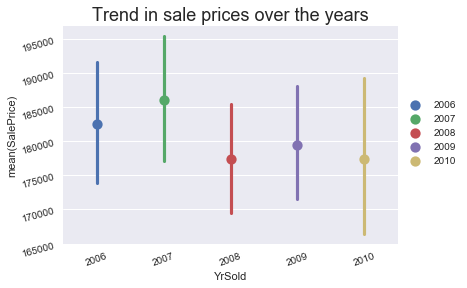

In [53]:
sns.pointplot(x='YrSold', y='SalePrice', hue= 'YrSold', data=train_df)

plt.legend(bbox_to_anchor=(1.2, 0.7))
plt.xticks(rotation=20)
plt.yticks(rotation=15)
plt.title("Trend in sale prices over the years", fontsize=18)

We see that 2010 sold houses at lower prices(in mean terms) 
and that 2007 has the highest prices

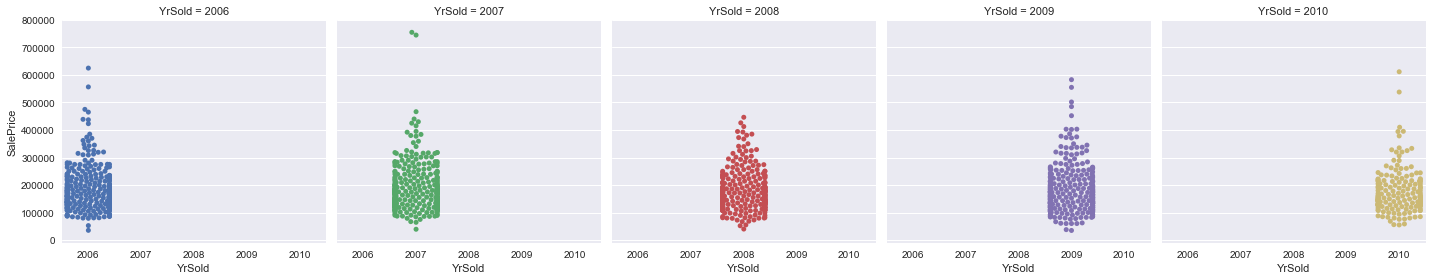

In [41]:
plt.figure(figsize=(8, 6))
sns.factorplot(x='YrSold',
               y='SalePrice', 
               data=train_df, 
               hue='YrSold', 
               col='YrSold', 
               kind='swarm',
               )  


In [36]:
train_df.groupby('TotRmsAbvGrd').size()

TotRmsAbvGrd
2       1
3      17
4      97
5     275
6     402
7     329
8     187
9      75
10     47
11     18
12     11
14      1
dtype: int64

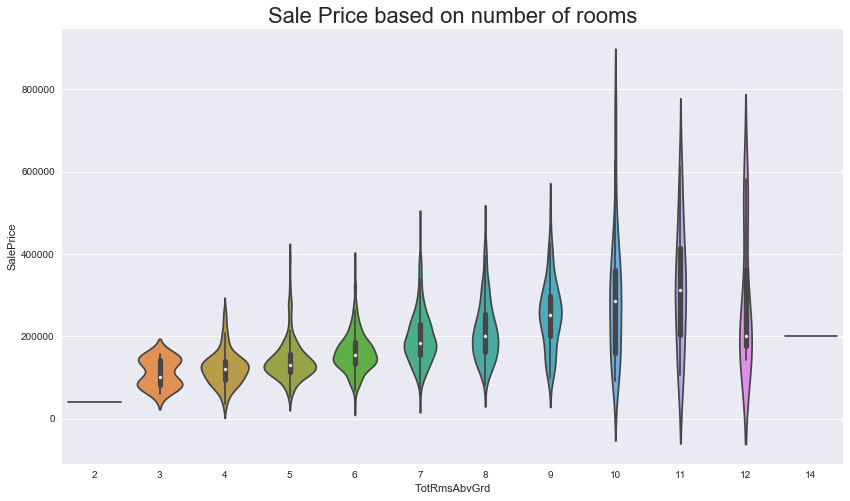

In [58]:
plt.figure(figsize=(14,8))
sns.violinplot(x='TotRmsAbvGrd', y='SalePrice', data=train_df)

plt.title("Sale Price based on number of rooms", fontsize=22)

We can see that the higher the rooms, the higher the price. <br>
However for 10, 11 & 12 rooms this trend is not really followed and seems unstable

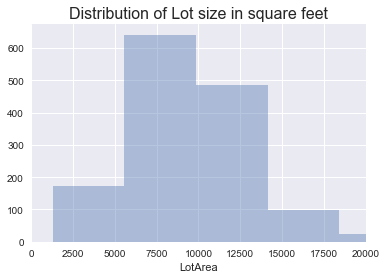

In [76]:
sns.distplot(train_df['LotArea'], kde=False)
plt.xlim(0, 20000)
plt.title("Distribution of Lot size in square feet", fontsize=16)

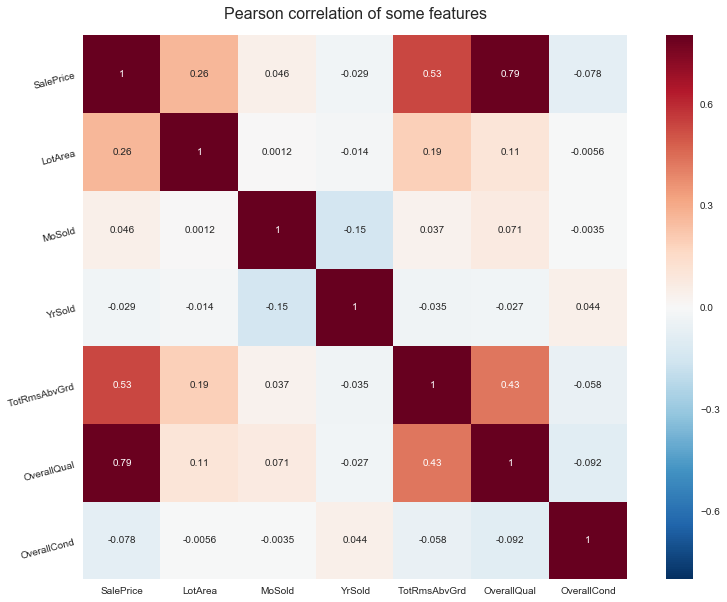

In [117]:
plt.figure(figsize=(14,10))

display = train_df[['SalePrice', 'LotArea', 'MoSold', 'YrSold', 'TotRmsAbvGrd',
                  'OverallQual', 'OverallCond']]
sns.heatmap(display.corr(), annot=True, square=True, vmax=0.8)
plt.yticks(rotation=15)
plt.title("Pearson correlation of some features", y=1.02, size=16)

The Pearson correlation plot tell us how strongly a feature is correlated with one another. <br>
We can observe that the Overall Quality is highly correlated with the Sale Price.<br>
There may be other features like that and we want to avoid that as
this <b> means that there is redundant or superfluous data in our training set and each feature does not always carry unique information </b>

In [119]:
a = train_df.drop('Id', axis=1).corr()
b = a['SalePrice']
(b > 0.6).value_counts()
# columns = train_df.drop('Id', axis=1).columns
# for column in columns:
#     print( (a[column] > 0.6).value_counts ) 
    

False    73
True      7
Name: SalePrice, dtype: int64

<h3 style="text-align:center">Split-out dataset</h3>

In [142]:
# Test options and evaluation metric
num_folds = 10
seed = 46
scoring = 'neg_mean_squared_error'

In [124]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,0,0,0,0,12,2008,8,4,250000


In [137]:
array = train_df.values
train_df.shape

X = array[ :, 1:train_df.shape[1] ]
Y = array[:, train_df.shape[1] - 1]

print(X.shape, Y.shape)

test_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
                                                   random_state=seed)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1460, 80) (1460,)
(1168, 80) (292, 80) (1168,) (292,)


We will leave more than 1000 rows of our training set to train the algorithms. <br>
The rest will serve to evaluate the algorithms until reaching an acceptable performance.

<h3 style="text-align:center">Evaluation algorithms: Ensemble Methods </h3>

In [143]:
ensembles = []
ensembles.append( ('XGB', XGBRegressor(seed=seed)) )
ensembles.append( ('RF', RandomForestRegressor()) )
results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


XGB: -52641535.484079 (84831772.941985)
RF: -67385658.124150 (101567143.041988)


<h3 style="text-align:center">Testing the model to (X_test, Y_test) before submission</h3>

In [144]:
model = XGBRegressor()
# fit model on training data
model.fit(X_train, Y_train)

# make predictions for test data
y_pred = model.predict(X_test)

predictions = mean_squared_error(Y_test, y_pred)**0.5
print(predictions)

4152.43434023
